In [1]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
train = pd.DataFrame()
for i in range(13):
    file_name = 'events_England_' + str(i+1) + '.json'
    path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
    with open(path) as f:
        data = json.load(f)
    train = pd.concat([train, pd.DataFrame(data)])


In [3]:
file_name = 'events_France.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
with open(path) as f:
    data = json.load(f)
train = pd.concat([train, pd.DataFrame(data)])

In [4]:
file_name = 'events_Spain.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
with open(path) as f:
    data = json.load(f)
train = pd.concat([train, pd.DataFrame(data)])

In [5]:
file_name = 'events_Germany.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
with open(path) as f:
    data = json.load(f)
train = pd.concat([train, pd.DataFrame(data)])

In [6]:
file_name = 'events_Italy.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]),'socceranalytics', 'Wyscout', file_name)
with open(path) as f:
    data = json.load(f)
train = pd.concat([train, pd.DataFrame(data)])

In [7]:
train = train.reset_index(drop=True)

In [8]:
shots = train.loc[train['subEventName'] == "Shot"]

In [9]:
shots = shots.reset_index(drop=True)

In [10]:
shots["X"] = shots.positions.apply(lambda cell: 100 - cell[0]['x'] * 105/100)
shots["Y"] = shots.positions.apply(lambda cell: cell[0]['y'] * 68/100)
shots["C"] = shots.positions.apply(lambda cell: abs(50 -cell[0]['y']) * 68/100)

In [11]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,X,Y,C
0,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,7.60,27.88,6.12
1,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247,10.75,35.36,1.36
2,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280,-0.80,35.36,1.36
3,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289,14.95,22.44,11.56
4,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429,21.25,20.40,13.60


In [12]:
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)
shots["Angle"] = np.where(np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)) > 0, 
                          np.arctan(7.32 * shots["X"] /(shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)), 
                          np.arctan(7.32 * shots["X"] /(shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)) + np.pi)
shots["Goal"] = shots.tags.apply(lambda x: 1 if {'id':101} in x else 0).astype(object)


In [13]:
shots['Angle'] = shots.Angle.apply(lambda x: np.rad2deg(x))

In [14]:
shots["Angle"] = np.where(np.arctan(7.32 * shots["X"] / (shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)) > 0, 
                          np.arctan(7.32 * shots["X"] /(shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)), 
                          np.arctan(7.32 * shots["X"] /(shots["X"]**2 + shots["C"]**2 - (7.32/2)**2)) + np.pi)

In [15]:
shots['Angle'] = shots.Angle.apply(lambda x: np.rad2deg(x))

In [16]:
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,X,Y,C,Distance,Angle,Goal
0,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212,7.60,27.88,6.12,9.757787,34.213411,1
1,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247,10.75,35.36,1.36,10.835686,37.108037,0
2,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280,-0.80,35.36,1.36,1.577847,28.233670,1
3,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289,14.95,22.44,11.56,18.898045,17.659511,0
4,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429,21.25,20.40,13.60,25.229398,14.016188,0


In [17]:
shots_model = shots[['X', 'Y', 'Distance', 'Angle', 'matchPeriod','Goal', 'C']]

In [18]:
shots_model.count()

X              40461
Y              40461
Distance       40461
Angle          40461
matchPeriod    40461
Goal           40461
C              40461
dtype: int64

In [19]:
shots_model.head()

,X,Y,Distance,Angle,matchPeriod,Goal,C
0,7.60,27.88,9.757787,34.213411,1H,1,6.12
1,10.75,35.36,10.835686,37.108037,1H,0,1.36
2,-0.80,35.36,1.577847,28.233670,1H,1,1.36
3,14.95,22.44,18.898045,17.659511,1H,0,11.56
4,21.25,20.40,25.229398,14.016188,1H,0,13.60


In [66]:
shots_model.drop('matchPeriod', axis = 1, inplace = True)

In [20]:
shots_model

,X,Y,Distance,Angle,matchPeriod,Goal,C
0,7.60,27.88,9.757787,34.213411,1H,1,6.12
1,10.75,35.36,10.835686,37.108037,1H,0,1.36
2,-0.80,35.36,1.577847,28.233670,1H,1,1.36
3,14.95,22.44,18.898045,17.659511,1H,0,11.56
4,21.25,20.40,25.229398,14.016188,1H,0,13.60
...,...,...,...,...,...,...,...
40456,0.25,30.60,3.409179,134.095263,2H,0,3.40
40457,2.35,25.84,8.491649,16.329899,2H,0,8.16
40458,5.50,31.28,6.135829,58.935057,2H,1,2.72
40459,17.05,21.76,20.988571,16.288390,2H,0,12.24


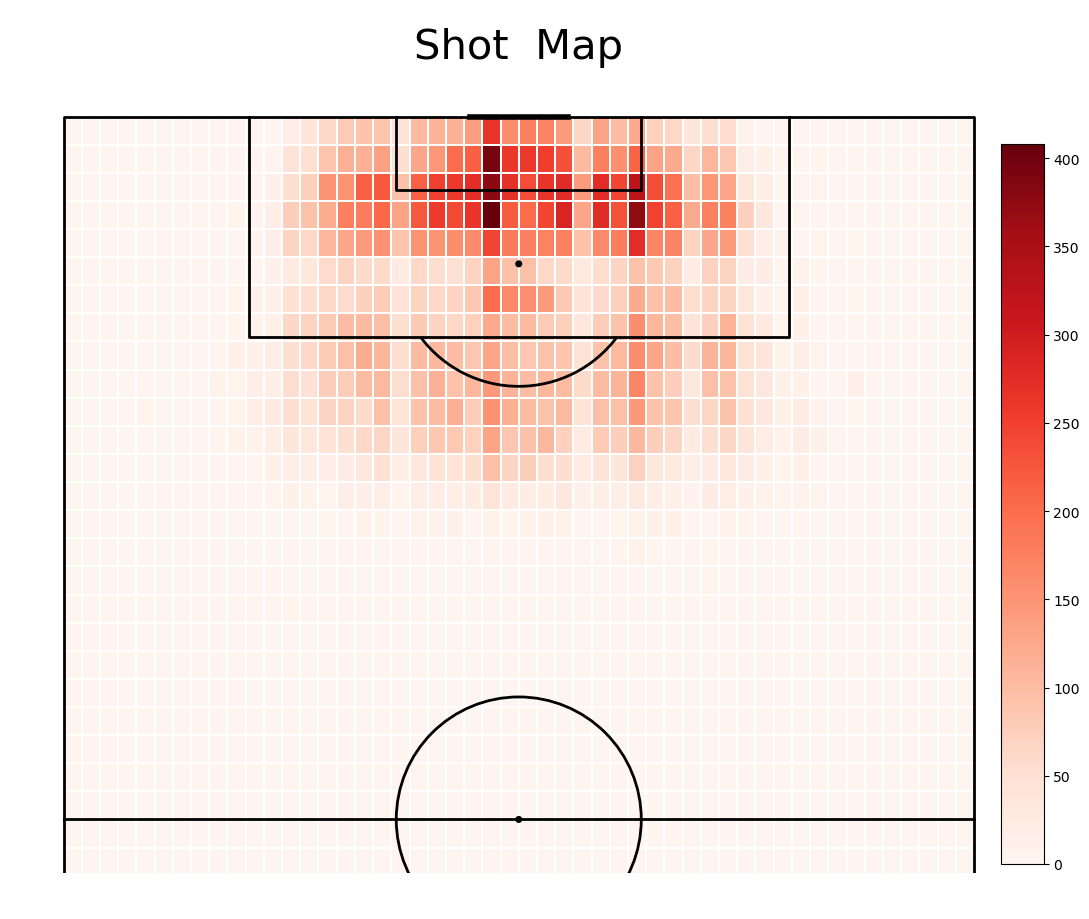

In [21]:
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic_shots = pitch.bin_statistic(105 - shots_model.X, shots_model.Y, bins=50)


pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0.01)
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot  Map' , fontsize = 30)
plt.show()

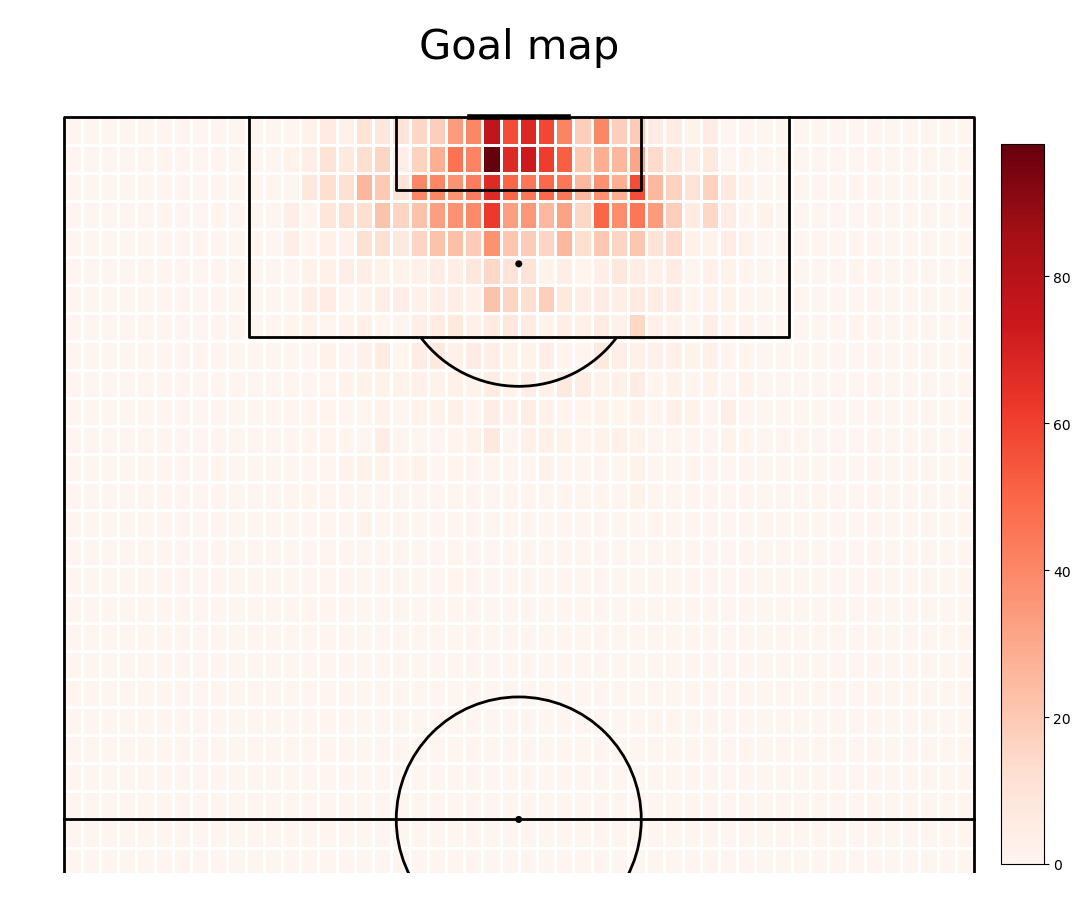

In [22]:
#take only goals
goals = shots_model.loc[shots["Goal"] == 1]
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#calculate number of goals in each bin
bin_statistic_goals = pitch.bin_statistic(105 - goals.X, goals.Y, bins=50)
#plot heatmap
pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Reds', edgecolor='white')
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal map' , fontsize = 30)
plt.show()

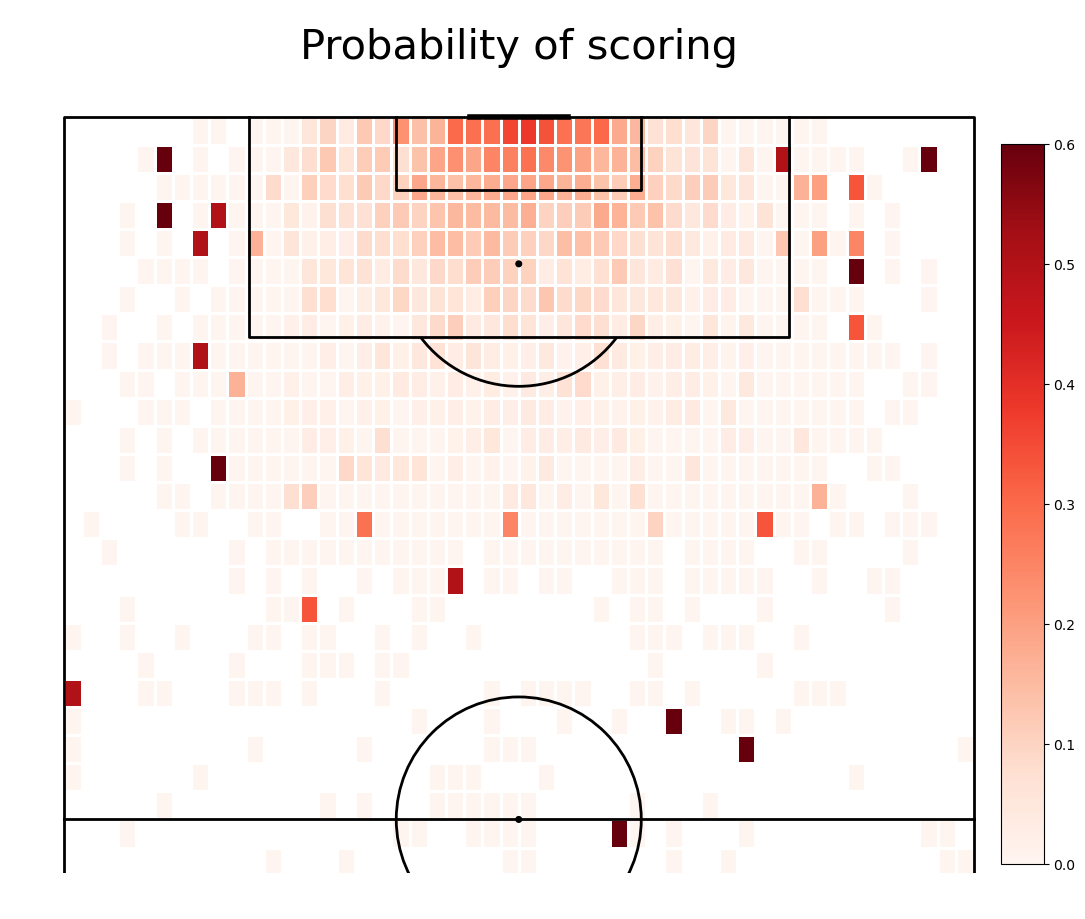

In [23]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(105 - shots.X, shots.Y, bins = 50)
#normalize number of goals by number of shots
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show() 

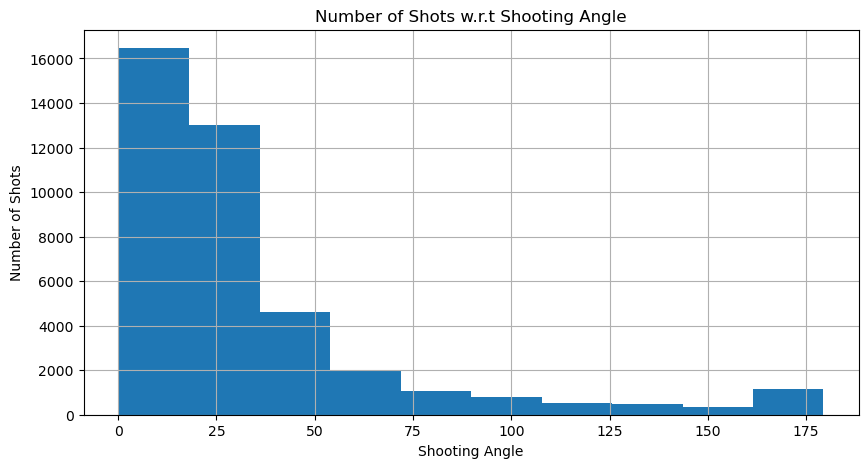

In [24]:
# Let us see a histogram of shots frequency from different angles
fig,ax = plt.subplots(figsize = (10,5))
shots_model.hist('Angle', ax = ax)

plt.title('Number of Shots w.r.t Shooting Angle')
plt.xlabel('Shooting Angle')
plt.ylabel('Number of Shots')
plt.show()

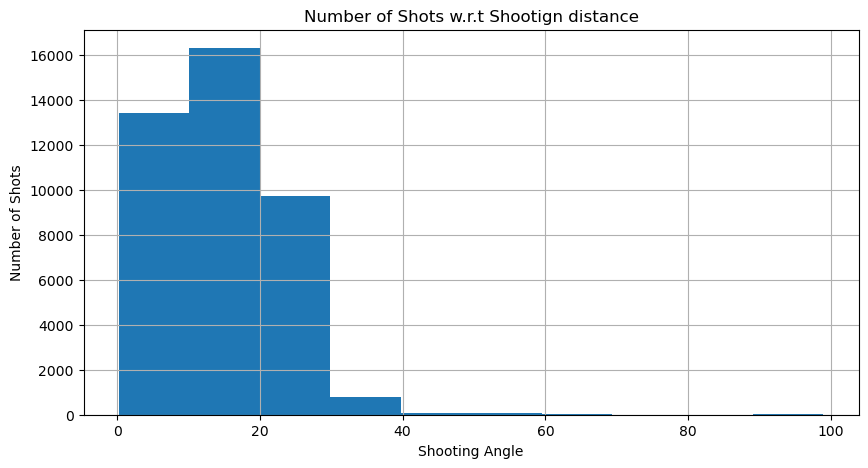

In [25]:
# Let us see a histogram of shots frequency from different angles
fig,ax = plt.subplots(figsize = (10,5))
shots_model.hist('Distance', ax = ax)

plt.title('Number of Shots w.r.t Shootign distance')
plt.xlabel('Shooting Angle')
plt.ylabel('Number of Shots')
plt.show()

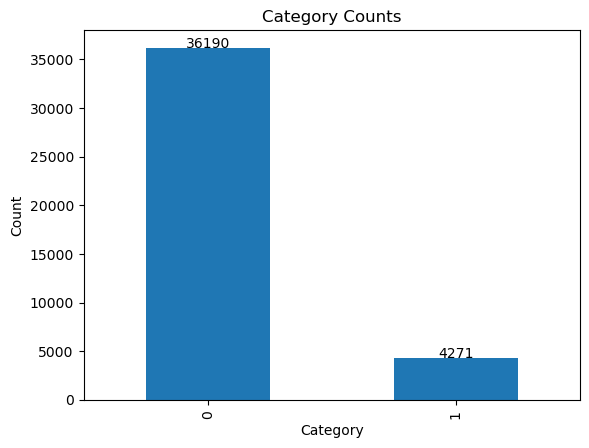

In [26]:
# Get the counts of each category
counts = shots_model['Goal'].value_counts()

# Create a bar plot
counts.plot.bar()

# Set the title and axis labels
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')

# Add text labels to the bars
for i, v in enumerate(counts):
    plt.text(i, v + 0.25, str(v), color='black', ha='center')
# Display the plot
plt.show()

In [27]:
X = shots_model[["X","Y", "Distance","Angle", "C"]]
X

,X,Y,Distance,Angle,C
0,7.60,27.88,9.757787,34.213411,6.12
1,10.75,35.36,10.835686,37.108037,1.36
2,-0.80,35.36,1.577847,28.233670,1.36
3,14.95,22.44,18.898045,17.659511,11.56
4,21.25,20.40,25.229398,14.016188,13.60
...,...,...,...,...,...
40456,0.25,30.60,3.409179,134.095263,3.40
40457,2.35,25.84,8.491649,16.329899,8.16
40458,5.50,31.28,6.135829,58.935057,2.72
40459,17.05,21.76,20.988571,16.288390,12.24


In [28]:
Y = shots_model[["Goal"]]

In [31]:
Y.dtypes

Goal    int32
dtype: object

In [30]:
Y = Y.astype('int32')

In [32]:
# Scaling the numeric continous features in our data set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_continuous = X[['X', 'Y','C', 'Distance', 'Angle']] # select only continuous columns
X_scaled = scaler.fit_transform(X_continuous)

X_scaled

array([[-0.39172377, -0.59830877, -0.31899617, -0.61342375, -0.00204973],
       [-0.02119109,  0.20102209, -1.23106198, -0.47893981,  0.07942949],
       [-1.37981093,  0.20102209, -1.23106198, -1.63399227, -0.17037016],
       ...,
       [-0.63874556, -0.23497656, -0.97047174, -1.06531652,  0.69382617],
       [ 0.71987428, -1.25230676,  0.85365988,  0.78778269, -0.50661122],
       [-1.00927825, -0.45297589, -0.5795864 , -1.16853892,  0.42323714]])

In [33]:
X = X.drop(['X', 'Y', 'C','Distance','Angle'], axis=1)

# Adding scaled columns to our dataset
X['X'] = X_scaled[:,0]
X['Y'] = X_scaled[:,1]
X['C'] = X_scaled[:,2]
X['Distance'] = X_scaled[:,3]
X['Angle'] = X_scaled[:,4]

# Finalized Feature Dataset
X

,X,Y,C,Distance,Angle
0,-0.391724,-0.598309,-0.318996,-0.613424,-0.002050
1,-0.021191,0.201022,-1.231062,-0.478940,0.079429
2,-1.379811,0.201022,-1.231062,-1.633992,-0.170370
3,0.472852,-1.179640,0.723365,0.526959,-0.468016
4,1.213918,-1.397640,1.114250,1.316889,-0.570570
...,...,...,...,...,...
40456,-1.256300,-0.307643,-0.840177,-1.405506,2.809469
40457,-1.009278,-0.816308,0.071889,-0.771393,-0.505443
40458,-0.638746,-0.234977,-0.970472,-1.065317,0.693826
40459,0.719874,-1.252307,0.853660,0.787783,-0.506611


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

In [36]:
count_class_0, count_class_1 = Y_train.value_counts()
print ('Shot in Training Data: ', count_class_0)
print ('Goals in Training Data: ', count_class_1)

Shot in Training Data:  27110
Goals in Training Data:  3235


In [37]:
weight_0 = count_class_0 / (count_class_0 + count_class_1)
weight_1 = count_class_1 / (count_class_0 + count_class_1)
print ('Weight of Shots Class in Training: ',weight_0)
print ('Weight of Goal Class in Training: ', weight_1)

Weight of Shots Class in Training:  0.8933926511781183
Weight of Goal Class in Training:  0.10660734882188169


In [38]:
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_model = LogisticRegression()

In [39]:
# Defining the hyperparameters to tune
# dictionary param_grid specifies the hyperparameters to tune for the logistic regression model. 
# The C parameter is the inverse of the regularization strength, penalty specifies the type of regularization to apply, and class_weight specifies
# how to handle class imbalance.
param_grid_lr = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'class_weight': ['balanced', {0:weight_0, 1:weight_1}]}


In [41]:
import time
# Starting the tiemr
start_time = time.time()

# Perform nested cross-validation with grid search

grid = GridSearchCV(lr_model, param_grid=param_grid_lr, cv=cv_inner, scoring='f1', n_jobs=-1)
scores = cross_val_score(grid, X_train, Y_train, cv=cv_outer, scoring='f1', n_jobs=-1)

# the array of F1-scores obtained by performing cross-validation on the training set using the GridSearchCV object
scores

array([0.30394357, 0.31457801, 0.30940675, 0.29844961, 0.30466989])

In [43]:
grid.fit(X_train, Y_train)
best_lr_model = grid.best_estimator_

# Stopping the tiemr
end_time = time.time()

lr_training_time = end_time - start_time

In [44]:
# Print the best parameters and training time
print("Best parameters: ", grid.best_params_)
print ("Model Training Time: {:.3f} seconds".format(lr_training_time))

Best parameters:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Model Training Time: 589.641 seconds


In [45]:
! pip install tabulate
from tabulate import tabulate
from scipy.stats import norm



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 1.0, 'Confusion Matrix - Train Set')

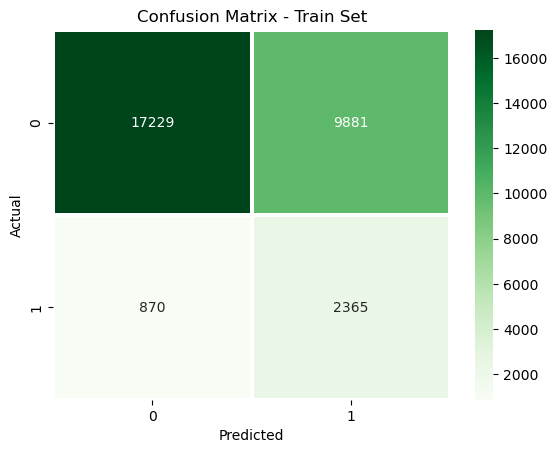

In [49]:
import seaborn as sns
cm_train = confusion_matrix(Y_train, best_lr_model.predict(X_train))

ax = sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Train Set')

In [51]:
print (classification_report(Y_train, best_lr_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.64      0.76     27110
           1       0.19      0.73      0.31      3235

    accuracy                           0.65     30345
   macro avg       0.57      0.68      0.53     30345
weighted avg       0.87      0.65      0.71     30345



Text(0.5, 1.0, 'Confusion Matrix - Test Set')

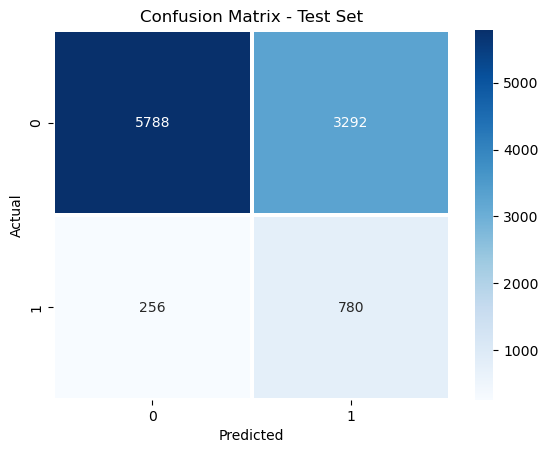

In [53]:
Y_pred = best_lr_model.predict(X_test)

# Confusion Matrix for Testig Data
cm_test = confusion_matrix(Y_test, Y_pred)

ax = sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Test Set')

In [55]:
print (classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.96      0.64      0.77      9080
           1       0.19      0.75      0.31      1036

    accuracy                           0.65     10116
   macro avg       0.57      0.70      0.54     10116
weighted avg       0.88      0.65      0.72     10116



In [56]:
!pip install xgboost
import xgboost as xgb


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 4.0 MB/s eta 0:00:32
   ---------------------------------------- 0.3/124.9 MB 4.3 MB/s eta 0:00:30
   ---------------------------------------- 0.4/124.9 MB 4.0 MB/s eta 0:00:31
   ---------------------------------------- 0.6/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 0.7/124.9 MB 3.8 MB/s eta 0:00:33
   ---------------------------------------- 0.9/124.9 MB 3.4 MB/s eta 0:00:37
   ---------------------------------------- 1.1/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 1.1/124.9 MB 3.7 MB/s eta 0:00:34
   ---------------------------------------- 1.4/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 1.5/124.9 MB 3.5 MB/s eta 0:00:36
    --------------------------------------- 1.6/124.9 MB 3.3 MB/s eta 0:00:38
    --------------------------------------- 1.8/124.9 MB 3.6 MB/s eta 0

In [57]:
# Defining the outer loop for train-test split
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining the inner loop for cross-validation on the training set
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [58]:
xgb_model = xgb.XGBClassifier()


In [61]:
# Determine scale_pos_weight based on class imbalance
count_class_0, count_class_1 = Y_train.value_counts()
print ('Shot in Training Data: ', count_class_0)
print ('Goals in Training Data: ', count_class_1)

Shot in Training Data:  27110
Goals in Training Data:  3235


In [62]:
# Class imbalance in training data
scale_pos_weight = count_class_0 / count_class_1
scale_pos_weight

8.380216383307573

In [63]:
param_grid_xgb = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300],
              'scale_pos_weight': [1, scale_pos_weight]}


In [64]:
grid_xg = GridSearchCV(xgb_model, param_grid=param_grid_xgb, cv=cv_inner, scoring='f1', n_jobs=-1)
scores_xg = cross_val_score(grid_xg, X_train, Y_train, cv=cv_outer, scoring='f1', n_jobs=-1)


In [66]:
grid_xg.fit(X_train, Y_train)
best_xgb_model = grid_xg.best_estimator_


In [67]:
print("Best parameters: ", grid_xg.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 8.380216383307573}


Text(0.5, 1.0, 'Confusion Matrix - Train Set')

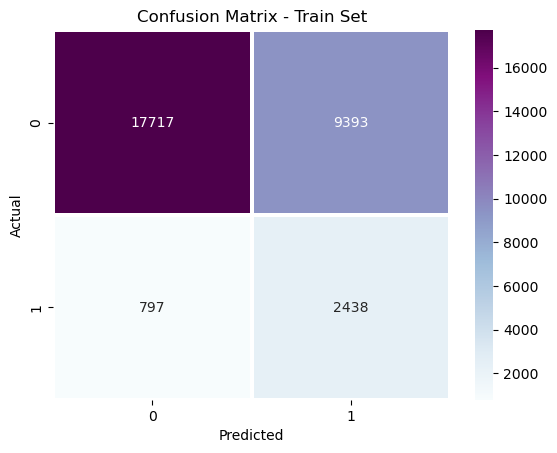

In [69]:
# Confusion Matrix for Training Data
cm_train_xg = confusion_matrix(Y_train, best_xgb_model.predict(X_train))

ax = sns.heatmap(cm_train_xg, annot=True, cmap='BuPu', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Train Set')

In [70]:
print (classification_report(Y_train, best_xgb_model.predict(X_train)))


              precision    recall  f1-score   support

           0       0.96      0.65      0.78     27110
           1       0.21      0.75      0.32      3235

    accuracy                           0.66     30345
   macro avg       0.58      0.70      0.55     30345
weighted avg       0.88      0.66      0.73     30345



Text(0.5, 1.0, 'Confusion Matrix - Test Set')

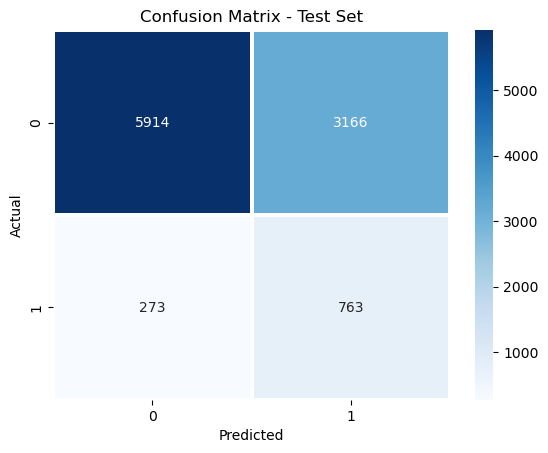

In [72]:
y_pred_xgb = best_xgb_model.predict(X_test)

# Confusion Matrix for Testig Data
cm_test_xgb = confusion_matrix(Y_test, y_pred_xgb)

ax = sns.heatmap(cm_test_xgb, annot=True, cmap='Blues', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Test Set')


In [74]:
print (classification_report(Y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.96      0.65      0.77      9080
           1       0.19      0.74      0.31      1036

    accuracy                           0.66     10116
   macro avg       0.58      0.69      0.54     10116
weighted avg       0.88      0.66      0.73     10116



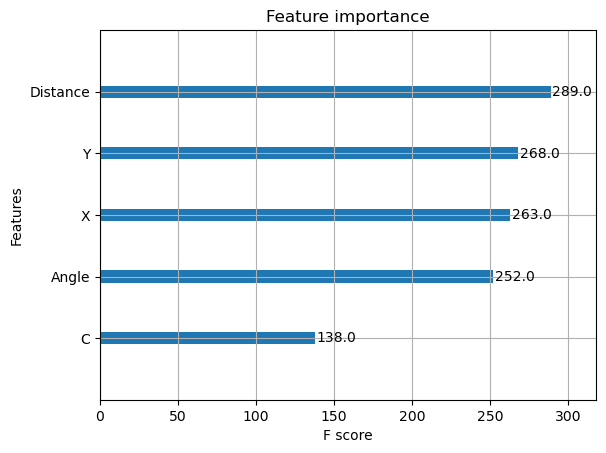

In [75]:
xgb.plot_importance(best_xgb_model)
plt.show()


In [78]:
prec_lr_train = precision_score(Y_train, best_lr_model.predict(X_train))

prec_xgb_train = precision_score(Y_train, best_xgb_model.predict(X_train))

prec_train = [prec_lr_train, prec_xgb_train]

# Precision scores for the four models on testing data
prec_lr_test = precision_score(Y_test, y_pred)

prec_xgb_test = precision_score(Y_test, y_pred_xgb)

prec_test = [prec_lr_test, prec_xgb_test]

# Recall scores for the four models on training data
rec_lr_train = recall_score(Y_train, best_lr_model.predict(X_train))

rec_xgb_train = recall_score(Y_train, best_xgb_model.predict(X_train))


rec_train = [rec_lr_train, rec_xgb_train]


# Calculting Recall for the four models on test data
rec_lr_test = recall_score(Y_test, y_pred)

rec_xgb_test = recall_score(Y_test, y_pred_xgb)

rec_test = [rec_lr_test, rec_xgb_test]

# Accuracy scores for the four models on training data
acc_lr_train = accuracy_score(Y_train, best_lr_model.predict(X_train))

acc_xgb_train = accuracy_score(Y_train, best_xgb_model.predict(X_train))

acc_train = [acc_lr_train, acc_xgb_train]

# Calculating Accuracy for the four models on test data
acc_lr_test = accuracy_score(Y_test, y_pred)

acc_xgb_test = accuracy_score(Y_test, y_pred_xgb)


acc_test = [acc_lr_test, acc_xgb_test]


In [79]:
summary_df = pd.DataFrame({'Model Name':['Logistic Regression','XG Boost'],
                          'Training Accuracy': acc_train, 'Training Precision': prec_train,'Training Recall':rec_train,
                          'Testing Accuracy': acc_test, 'Testing Precision': prec_test,'Testing Recall':rec_test
                          })

summary_df.set_index('Model Name', inplace=True)
# Displaying summary of results
summary_df.style.format(precision =3).highlight_max(color='cyan').set_properties(**{'font-weight': 'bold',
            'border': '2.0px solid grey','color': 'purple'}).highlight_min(color='yellow')


,Training Accuracy,Training Precision,Training Recall,Testing Accuracy,Testing Precision,Testing Recall
Model Name,,,,,,
Logistic Regression,0.646,0.193,0.731,0.649,0.192,0.753
XG Boost,0.664,0.206,0.754,0.660,0.194,0.736
